In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/dermatology_database_1.csv')

In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

- Need to define `age` data type

In [5]:
for value in data['age'].unique():
    if not value.isdigit():
        print('Count of "?" values in age:', data[data['age'] == value].shape[0])
        print('Percentage of "?" values in age:', len(data[data['age'] == value]) / len(data) * 100)

Count of "?" values in age: 8
Percentage of "?" values in age: 2.185792349726776


In [6]:
# Due to low percentage of "?" values in age, I'll can drop them
data = data[data['age'] != '?']
data = data.astype({"age": "int64"})

## EDA

### Statistical Summary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,358.0,2.078212,0.664865,0.0,2.0,2.0,2.75,3.0
scaling,358.0,1.807263,0.701541,0.0,1.0,2.0,2.00,3.0
definite_borders,358.0,1.569832,0.900909,0.0,1.0,2.0,2.00,3.0
itching,358.0,1.354749,1.135062,0.0,0.0,1.0,2.00,3.0
koebner_phenomenon,358.0,0.636872,0.908709,0.0,0.0,0.0,1.00,3.0
polygonal_papules,358.0,0.449721,0.956468,0.0,0.0,0.0,0.00,3.0
follicular_papules,358.0,0.170391,0.576394,0.0,0.0,0.0,0.00,3.0
oral_mucosal_involvement,358.0,0.379888,0.837388,0.0,0.0,0.0,0.00,3.0
knee_and_elbow_involvement,358.0,0.622905,0.990278,0.0,0.0,0.0,1.00,3.0
scalp_involvement,358.0,0.530726,0.912352,0.0,0.0,0.0,1.00,3.0


- All clinical and histopathological values were given a degree in the range of 0 to 3 (explained in the data source):
  - 0 indicates that the feature was not present.
  - 3 indicates the largest amount possible.
  - 1, 2 indicate the relative intermediate values.

### Missing values

In [44]:
data.isnull().values.any()

False

- There is not missing values

### Target class balance

Text(0.5, 1.0, 'Target "class" distribution')

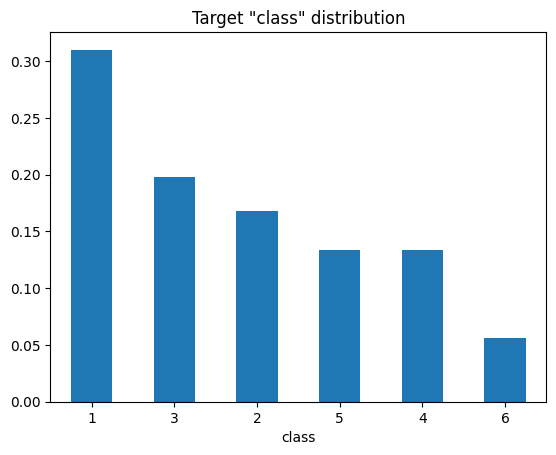

In [9]:
data['class'].value_counts(normalize=True).plot(kind='bar', rot=0).set_title('Target "class" distribution')

- There is class imbalance in the target variable. It is necessary to use a metric that is not sensitive to class imbalance and/or use a resampling technique.

### Featuere correlations with target variable

In [48]:
for col in data.drop(['class'], axis=1).columns:
    print(pd.crosstab(data[col], data['class'], normalize='index').mul(100))
    print()

class             1          2          3          4          5         6
erythema                                                                 
0         25.000000   0.000000  25.000000   0.000000  50.000000  0.000000
1         12.962963   9.259259  12.962963  20.370370  40.740741  3.703704
2         29.523810  15.714286  22.857143  14.761905  10.000000  7.142857
3         45.555556  24.444444  16.666667   6.666667   3.333333  3.333333

class            1          2          3          4          5         6
scaling                                                                 
0         0.000000   0.000000  25.000000   0.000000  75.000000  0.000000
1        12.380952   6.666667  25.714286  21.904762  28.571429  4.761905
2        32.642487  21.761658  19.170984  12.953368   5.699482  7.772021
3        67.307692  21.153846   9.615385   0.000000   1.923077  0.000000

class                     1          2          3          4          5  \
definite_borders                         

<Axes: >

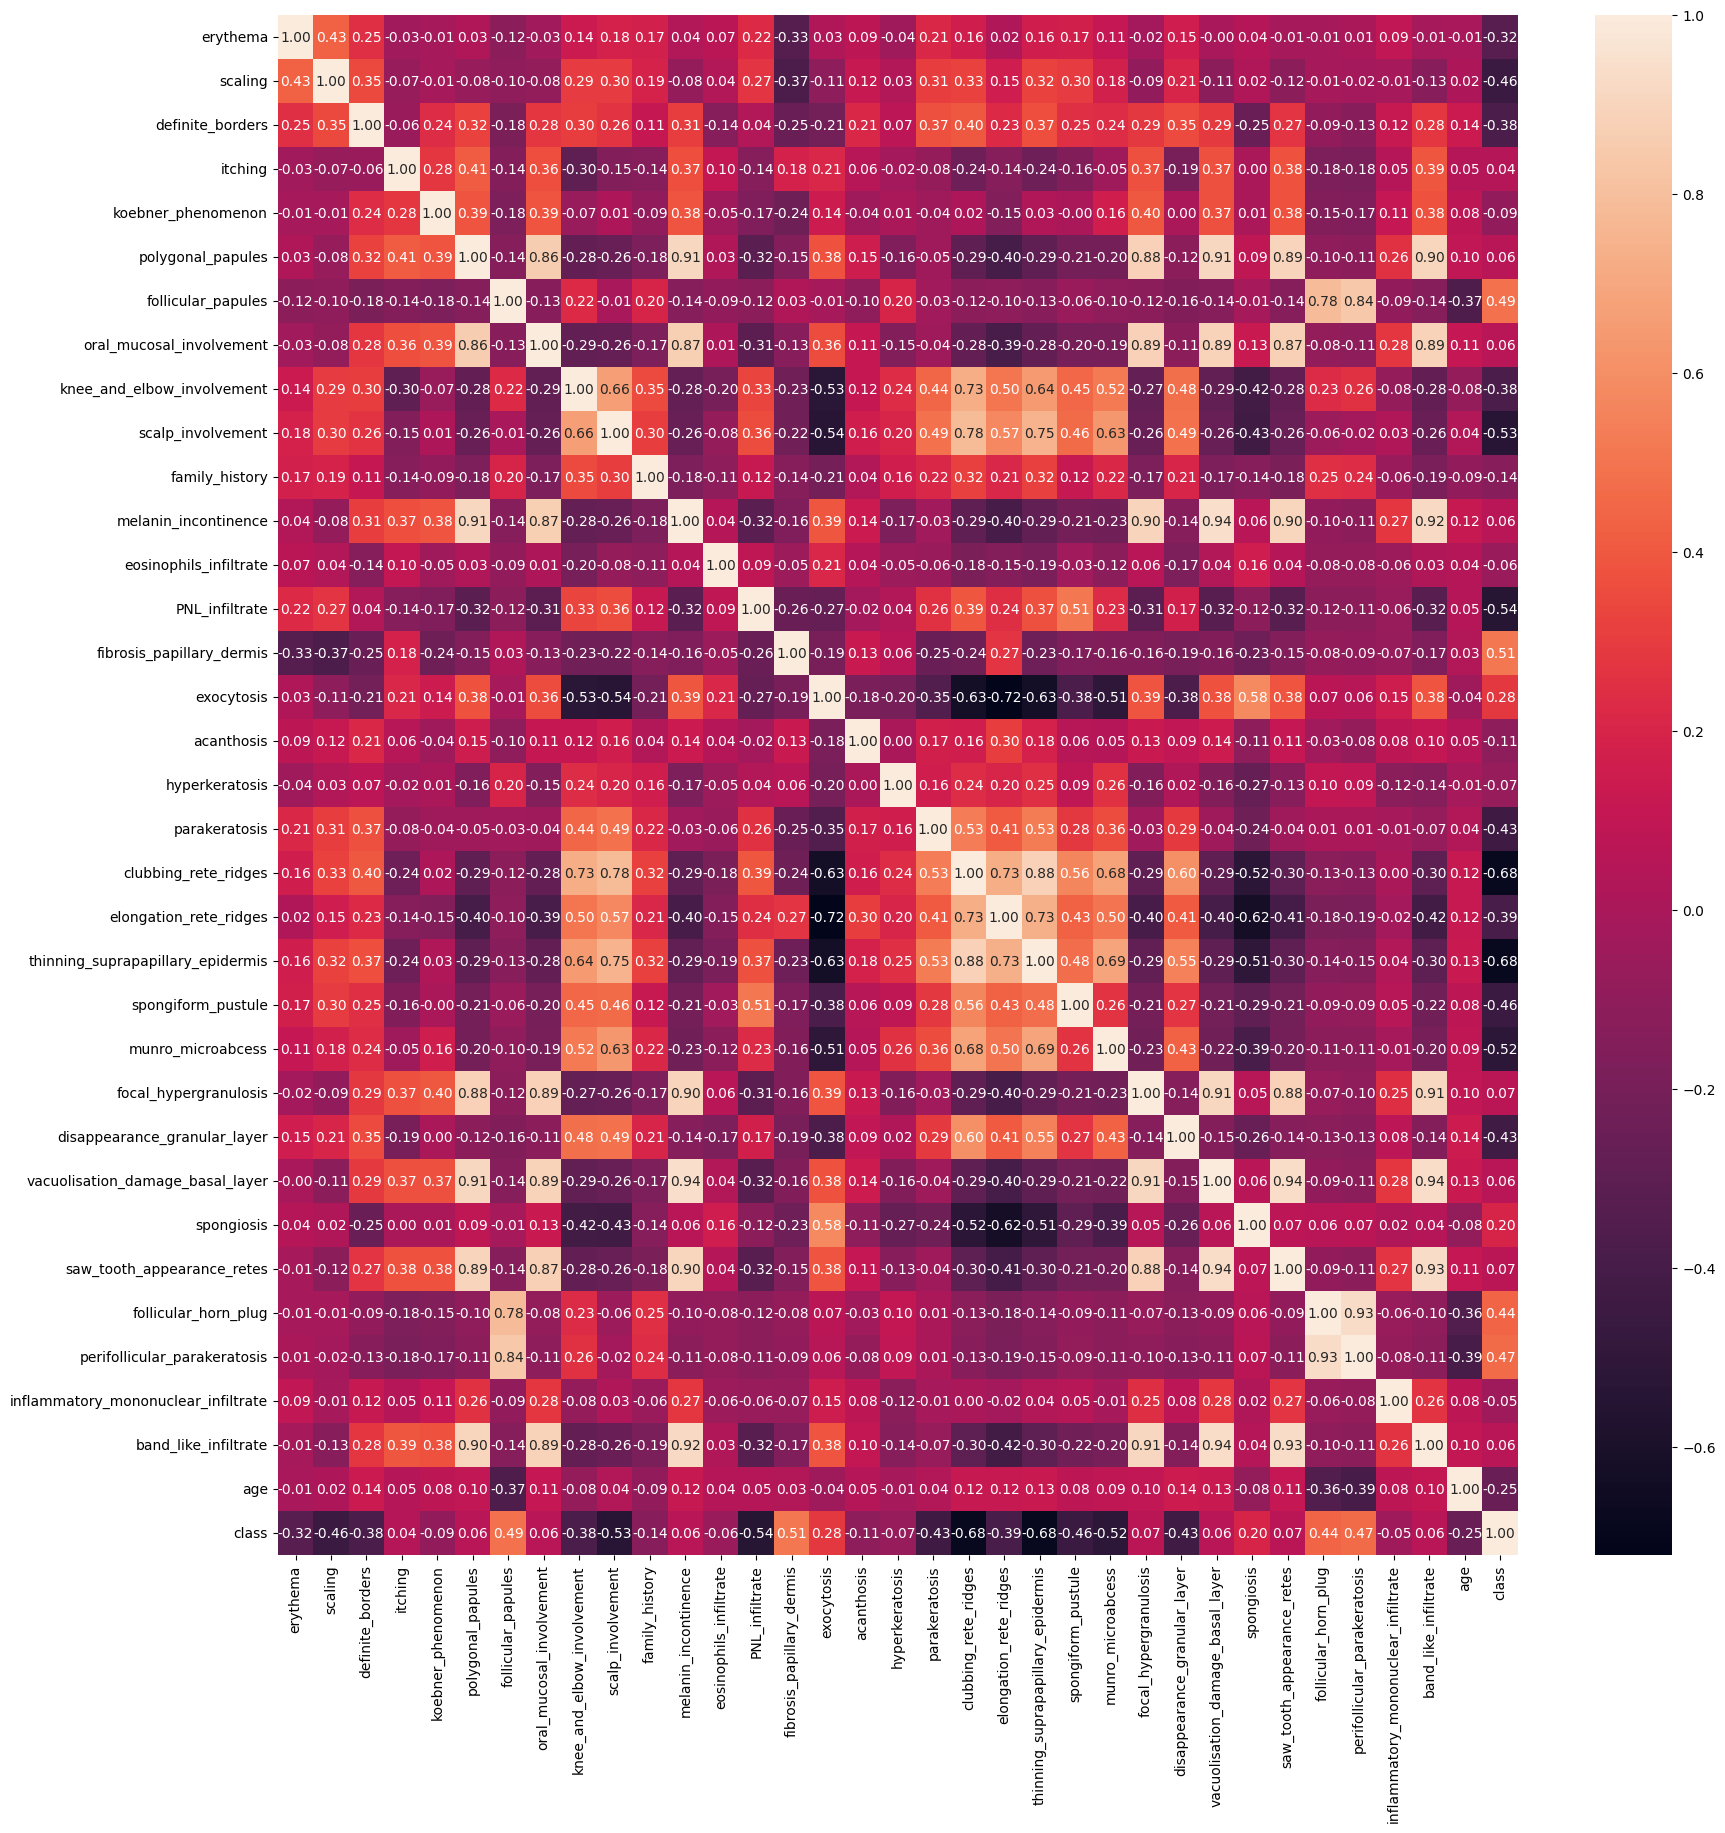

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')

In [34]:
corr = data.corr()
corr = corr[corr != 1].unstack()
pearson_high_corr_features = corr[corr > 0.7].sort_values(kind="quicksort", ascending=False).index.droplevel().unique().tolist()
corr[corr > 0.7].sort_values(kind="quicksort", ascending=False)


vacuolisation_damage_basal_layer   melanin_incontinence                 0.942366
melanin_incontinence               vacuolisation_damage_basal_layer     0.942366
vacuolisation_damage_basal_layer   saw_tooth_appearance_retes           0.937678
saw_tooth_appearance_retes         vacuolisation_damage_basal_layer     0.937678
band_like_infiltrate               vacuolisation_damage_basal_layer     0.937120
vacuolisation_damage_basal_layer   band_like_infiltrate                 0.937120
perifollicular_parakeratosis       follicular_horn_plug                 0.928843
follicular_horn_plug               perifollicular_parakeratosis         0.928843
band_like_infiltrate               saw_tooth_appearance_retes           0.928171
saw_tooth_appearance_retes         band_like_infiltrate                 0.928171
band_like_infiltrate               melanin_incontinence                 0.919119
melanin_incontinence               band_like_infiltrate                 0.919119
polygonal_papules           

In [35]:
corr = data.corr(method='spearman')
corr = corr[corr != 1].unstack()
spearman_high_corr_features = corr[corr > 0.7].sort_values(kind="quicksort", ascending=False).index.droplevel().unique().tolist()
corr[corr > 0.7].sort_values(kind="quicksort", ascending=False).head(20)

melanin_incontinence              vacuolisation_damage_basal_layer    0.980190
vacuolisation_damage_basal_layer  melanin_incontinence                0.980190
focal_hypergranulosis             vacuolisation_damage_basal_layer    0.968998
vacuolisation_damage_basal_layer  focal_hypergranulosis               0.968998
focal_hypergranulosis             melanin_incontinence                0.966022
melanin_incontinence              focal_hypergranulosis               0.966022
saw_tooth_appearance_retes        vacuolisation_damage_basal_layer    0.964976
vacuolisation_damage_basal_layer  saw_tooth_appearance_retes          0.964976
melanin_incontinence              saw_tooth_appearance_retes          0.956623
saw_tooth_appearance_retes        melanin_incontinence                0.956623
polygonal_papules                 melanin_incontinence                0.952845
melanin_incontinence              polygonal_papules                   0.952845
saw_tooth_appearance_retes        focal_hypergranulo

In [36]:
print('List of variables with high correlation (>0.7):')
pearson_high_corr_features

List of variables with high correlation (>0.7):


['melanin_incontinence',
 'vacuolisation_damage_basal_layer',
 'saw_tooth_appearance_retes',
 'band_like_infiltrate',
 'follicular_horn_plug',
 'perifollicular_parakeratosis',
 'polygonal_papules',
 'focal_hypergranulosis',
 'oral_mucosal_involvement',
 'clubbing_rete_ridges',
 'thinning_suprapapillary_epidermis',
 'follicular_papules',
 'scalp_involvement',
 'elongation_rete_ridges',
 'knee_and_elbow_involvement']

In [37]:
print('List of variables with high correlation (>0.7):')
spearman_high_corr_features

List of variables with high correlation (>0.7):


['vacuolisation_damage_basal_layer',
 'melanin_incontinence',
 'focal_hypergranulosis',
 'saw_tooth_appearance_retes',
 'polygonal_papules',
 'band_like_infiltrate',
 'oral_mucosal_involvement',
 'perifollicular_parakeratosis',
 'follicular_horn_plug',
 'clubbing_rete_ridges',
 'thinning_suprapapillary_epidermis',
 'scalp_involvement',
 'munro_microabcess',
 'follicular_papules',
 'elongation_rete_ridges',
 'knee_and_elbow_involvement']

In [40]:
set(spearman_high_corr_features) - set(pearson_high_corr_features)

{'munro_microabcess'}

- Correlations between variables seem promissing: > 10 features with correlation > 0.7
- Pearson and spearman highly correlated features are almost the same.